In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from statsmodels.tsa.stattools import adfuller
from scipy import signal
from scipy import stats

In [ ]:
# Valor RMS de una señal
def calcular_rms(senal):
    return np.sqrt(np.mean(senal**2))

# Funcion para graficar 1 señal
def plot_señal(t, senal, titulo="", xlabel="Tiempo (s)", ylabel="Amplitud"):
    plt.figure(figsize=(10, 4))
    plt.plot(t, senal)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Funcion para graficar comparativos entre 2 señales
def plot_comparativo(t, asc, filt, title="ECG"):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, asc, 'b', alpha=0.7)
    plt.title(f"{title} - Señal Cruda")
    plt.ylabel("Amplitud (μV)")
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, filt, 'g')
    plt.title(f"{title} - Señal Filtrada")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud (μV)")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

In [5]:
# Cargar datos del archivo .mat
data = sio.loadmat('signals.mat')

# Mostrar variables del archivo .mat
print("Nombres variables en el archivo:")
print(data.keys())

# Información sobre cada variable
print("\nInformación de las variables:")
for key in data.keys():
    if not key.startswith('__'): # Excluir claves especiales
        print(f"\nVariable: {key}")
        print(f"Dimensión: {data[key].shape if hasattr(data[key], 'shape') else 'N/A'}")
        
        # 5 primeras muestras
        if isinstance(data[key], np.ndarray):
            print("Primeras 5 muestras:")
            print(data[key][:5] if len(data[key].shape) == 1 else data[key][:5, :])

   

Nombres variables en el archivo:
dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])

Información de las variables:

Variable: Fs
Dimensión: (1, 1)
Primeras 5 muestras:
[[1024]]

Variable: ECG_asRecording
Dimensión: (1, 30720)
Primeras 5 muestras:
[[3904.31689453 3939.203125   3976.00683594 ... 4366.41064453
  4365.31103516 4370.91796875]]

Variable: ECG_filtered
Dimensión: (1, 30720)
Primeras 5 muestras:
[[ 8.87103896e-03  5.62737497e+01  8.57077127e+01 ... -1.20952610e+02
  -1.31734356e+02 -1.32898021e+02]]

Variable: EMG_filtered1
Dimensión: (1, 30721)
Primeras 5 muestras:
[[ 17.65905117  19.41391578  18.89666666 ... 242.49414224 220.4135886
  151.5810508 ]]

Variable: EMG_filtered2
Dimensión: (1, 30721)
Primeras 5 muestras:
[[  21.1780547   -79.82418538 -133.65960989 ... -384.58994036
  -539.9349533  -772.65519631]]

Variable: EMG_asRecording1
Dimensión: (1, 30721)

Duración total de la señal: 30.00 segundos


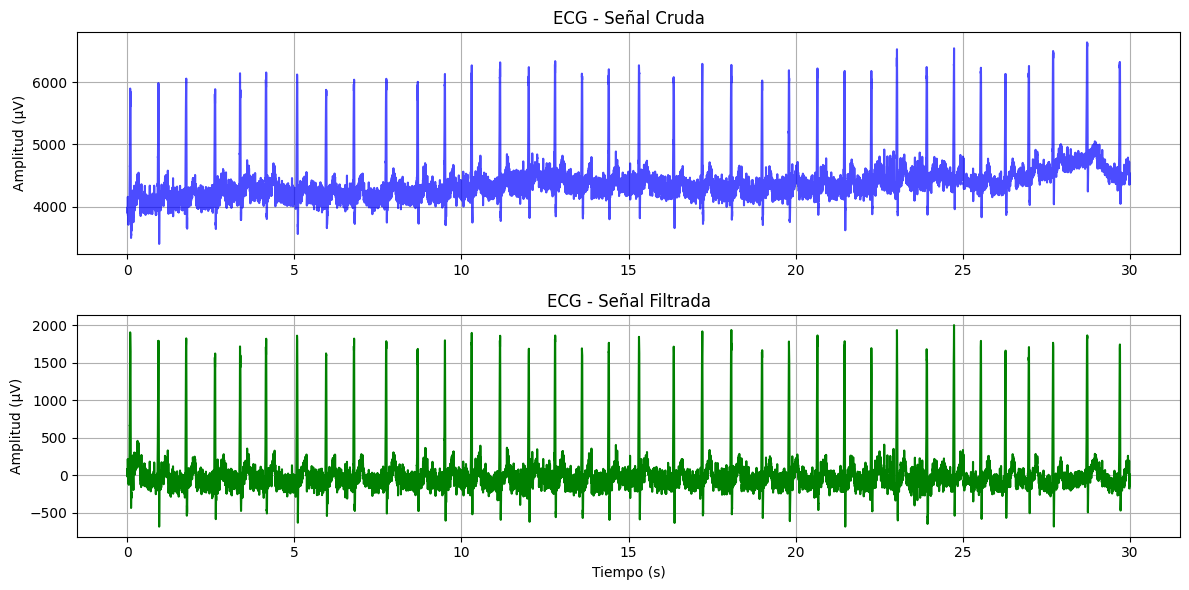

In [ ]:
# Creacion vector de tiempo
ecg_as = data['ECG_asRecording'][0]  # Volvemos el Array en 1D
ecg_filt = data['ECG_filtered'][0]   # Volvemos el Array en 1D

# Parámetros
fs = int(data['Fs'][0][0])           
n_muestras = len(ecg_as)            
duracion = n_muestras / fs

# Vector de tiempo
t = np.linspace(0, duracion, n_muestras, endpoint=False)

# Duración de la señal
print(f"Duración total de la señal: {duracion:.2f} segundos")
# Gráfica
plot_comparativo(t, ecg_as, ecg_filt)


Estadísticas del ciclo asRecording:
Promedio: 4163.02
RMS: 4174.00
Varianza: 91567.86
Desviación estándar: 302.60


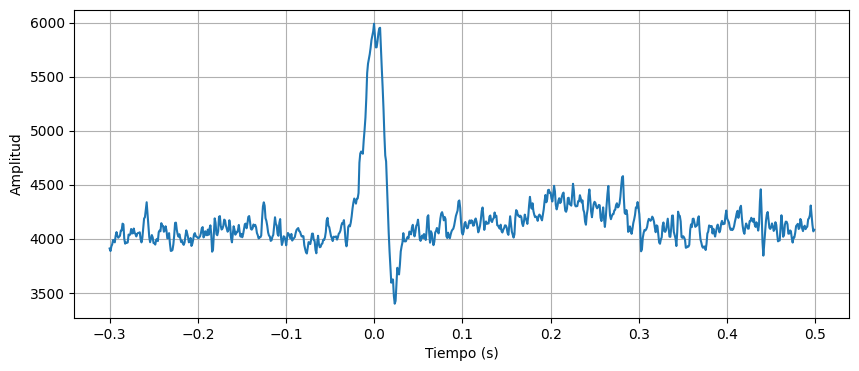


Estadísticas del ciclo Filtered:
Promedio: 4.90
RMS: 298.03
Varianza: 88800.36
Desviación estándar: 297.99


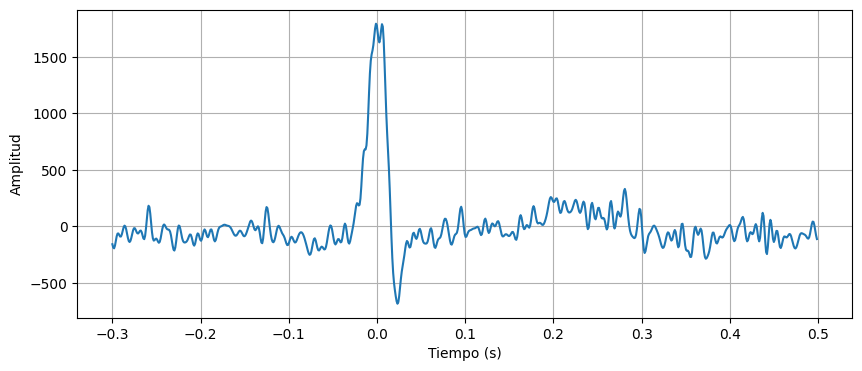

In [ ]:
# Ciclo cardiaco asRecording y filtered
# Detectamos picos para encontrar un ciclo en ambas señales
picos_ra, _ = signal.find_peaks(ecg_as, height=np.mean(ecg_as) + 3*np.std(ecg_as), distance=int(0.5*fs)) # asrecording
picos_rf, _ = signal.find_peaks(ecg_filt, height=np.mean(ecg_filt) + 3*np.std(ecg_filt), distance=int(0.5*fs)) # filtered

# Ciclo asrecording
# Ciclo cardiaco, medidas y gráfica
if len(picos_ra) > 0:
    pico = picos_ra[1]  # Primer pico detectado
    inicio = max(0, pico - int(0.3*fs))  # 0.3s antes
    fin = min(len(ecg_as), pico + int(0.5*fs))  # 0.5s después
    ciclo_a = ecg_as[inicio:fin]
    tiempo_a = np.arange(len(ciclo_a)) / fs - 0.3  # Vector de tiempo
    # Medidas
    print("\nEstadísticas del ciclo asRecording:")
    print(f"Promedio: {np.mean(ciclo_a):.2f}")
    print(f"RMS: {np.sqrt(np.mean(ciclo_a**2)):.2f}")
    print(f"Varianza: {np.var(ciclo_a):.2f}")
    print(f"Desviación estándar: {np.std(ciclo_a):.2f}")
    # Gráfico
    plot_señal(tiempo_a,ciclo_a)

# Ciclo filtered
# Ciclo cardiaco, medidas y gráfica
if len(picos_rf) > 0:
    pico = picos_ra[1]  # Primer pico detectado
    inicio = max(0, pico - int(0.3*fs))  # 0.3s antes
    fin = min(len(ecg_filt), pico + int(0.5*fs))  # 0.5s después
    ciclo_f = ecg_filt[inicio:fin]
    tiempo_f = np.arange(len(ciclo_f)) / fs - 0.3  # Vector de tiempo
    #Medidas
    print("\nEstadísticas del ciclo Filtered:")
    print(f"Promedio: {np.mean(ciclo_f):.2f}")
    print(f"RMS: {np.sqrt(np.mean(ciclo_f**2)):.2f}")
    print(f"Varianza: {np.var(ciclo_f):.2f}")
    print(f"Desviación estándar: {np.std(ciclo_f):.2f}")
    # Grafico
    plot_señal(tiempo_f,ciclo_f)


    
    

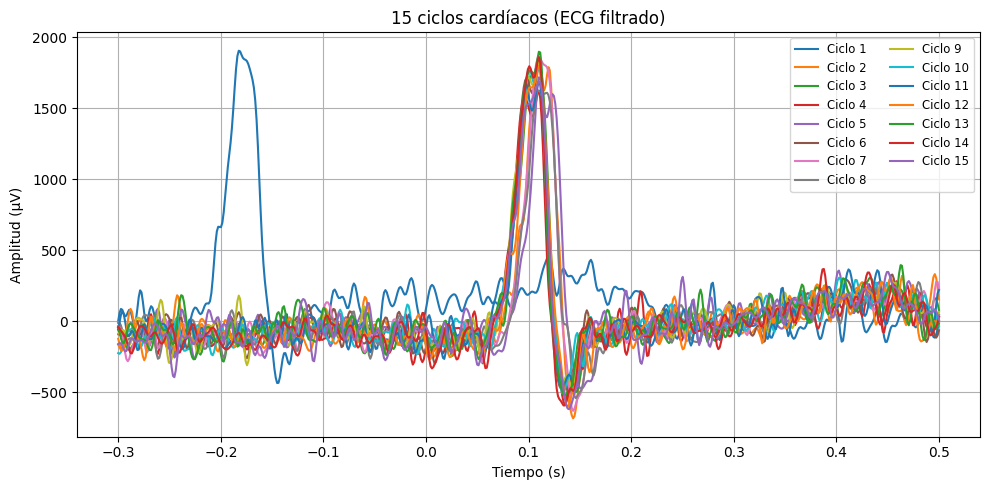

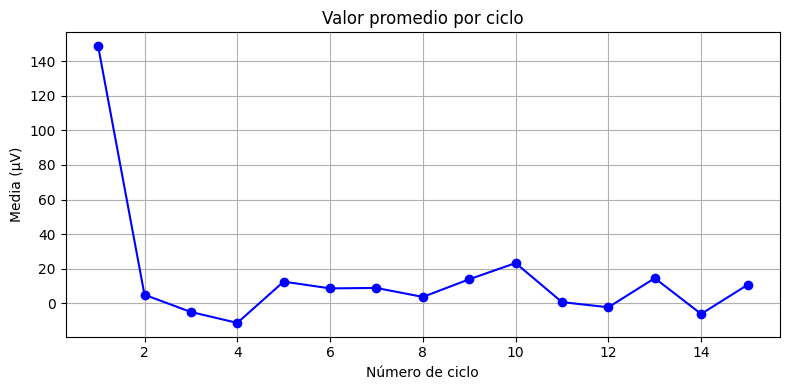

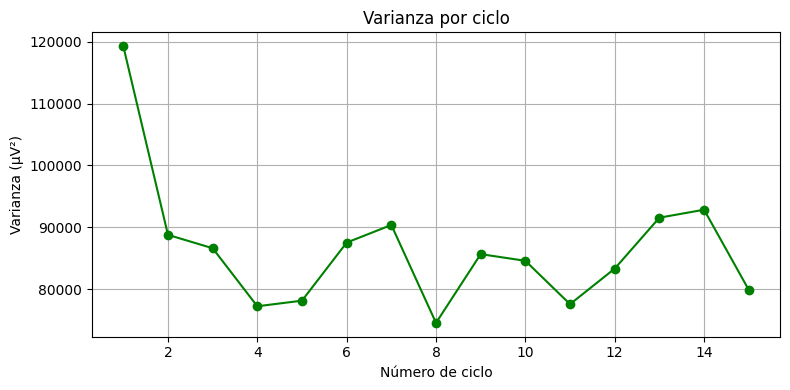

Coeficiente de variación: 245.5%


In [15]:
# Detección de picos R en señal filtered
picos_r, _ = signal.find_peaks(ecg_filt, height=np.mean(ecg_filt) + 2*np.std(ecg_filt),distance=int(0.5*fs))

# 15 ciclos de la señal
n_ciclos = min(15, len(picos_r))  # maximo 15 ciclos
ciclos = []
medias = []
varianzas = []
posiciones_picos = []  # Almacenar tiempos de los picos

# Recorrido por cada ciclo
for i in range(n_ciclos):
    inicio = max(0, picos_r[i] - int(0.3*fs)) # 0.3s antes
    fin = min(len(ecg_filt), picos_r[i] + int(0.5*fs)) # 0.5s después
    ciclo = ecg_filt[inicio:fin]
    ciclos.append(ciclo)
    medias.append(np.mean(ciclo))
    varianzas.append(np.var(ciclo))
    posiciones_picos.append(picos_r[i]/fs)  # tiempo en segundos

# Gráfica 15 ciclos
plt.figure(figsize=(10, 5))
tiempos_relativos = [] # Tiempo
min_longitud = min([len(ciclo) for ciclo in ciclos]) # Verificación longitud

# Recorrer cada ciclo para la grafica
for i, ciclo in enumerate(ciclos):
    ciclo = ciclo[:min_longitud] # Ciclos a la misma longitud mínima
    tiempos_relativos = np.linspace(-0.3, 0.5, min_longitud)  # Tiempo
    plt.plot(tiempos_relativos, ciclo, label=f'Ciclo {i+1}')

plt.title("15 ciclos cardíacos (ECG filtrado)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (μV)")
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica de media por ciclo
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_ciclos+1), medias, 'o-', color='blue')
plt.title("Valor promedio por ciclo")
plt.xlabel("Número de ciclo")
plt.ylabel("Media (μV)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica de varianza por ciclo
plt.figure(figsize=(8, 4))
plt.plot(range(1, n_ciclos+1), varianzas, 'o-', color='green')
plt.title("Varianza por ciclo")
plt.xlabel("Número de ciclo")
plt.ylabel("Varianza (μV²)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Para medir la dispersión entre desviacion estandar y media
print(f"Coeficiente de variación: {np.std(medias)/np.mean(medias)*100:.1f}%")



Comparación entre Ciclo 2 y Ciclo 5
- Duración Ciclo 2: 0.800s | Ciclo 5: 0.800s

Prueba de normalidad (Shapiro-Wilk):
Ciclo 2: p-valor = 0.0000 (No normal)
Ciclo 5: p-valor = 0.0000 (No normal)

Prueba de homocedasticidad (Levene):
- p-valor = 0.8425 (Varianzas iguales)

Prueba U de Mann-Whitney (no paramétrica):
- p-valor = 0.0427 (Diferencia significativa)


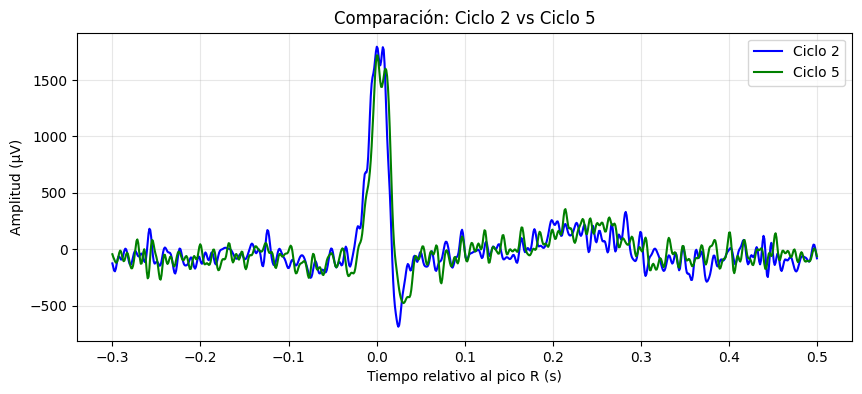


Comparación entre Ciclo 8 y Ciclo 12
- Duración Ciclo 8: 0.800s | Ciclo 12: 0.800s

Prueba de normalidad (Shapiro-Wilk):
Ciclo 8: p-valor = 0.0000 (No normal)
Ciclo 12: p-valor = 0.0000 (No normal)

Prueba de homocedasticidad (Levene):
- p-valor = 0.4806 (Varianzas iguales)

Prueba U de Mann-Whitney (no paramétrica):
- p-valor = 0.0567 (No hay diferencia significativa)


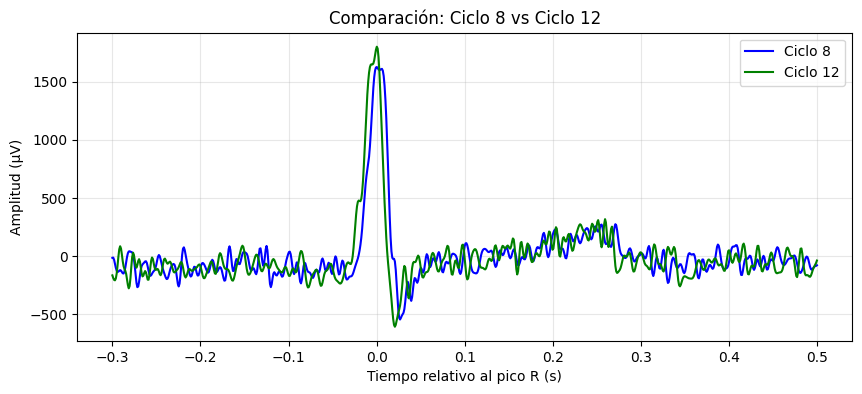

In [ ]:
# Pruebas estadisticas:
# 2 pares de ciclos diferentes
# Par 1: Ciclos 2 y 5
ciclo_a = ciclos[1]  
ciclo_b = ciclos[4]
# Par 2: Ciclos 8 y 12, mirar si existen
ciclo_c = ciclos[7] if len(ciclos) > 7 else ciclos[-1]
ciclo_d = ciclos[11] if len(ciclos) > 11 else ciclos[0]

# Función para comparar los ciclos
def comparar_ciclos(ciclo1, ciclo2, nombre1="Ciclo 1", nombre2="Ciclo 2"):
    print(f"\nComparación entre {nombre1} y {nombre2}")
    print(f"- Duración {nombre1}: {len(ciclo1)/fs:.3f}s | {nombre2}: {len(ciclo2)/fs:.3f}s") # Duración del ciclo
    
    # Prueba normalidad (Shapiro-Wilk)
    _, p1 = stats.shapiro(ciclo1)
    _, p2 = stats.shapiro(ciclo2)
    print(f"\nPrueba de normalidad (Shapiro-Wilk):")
    print(f"{nombre1}: p-valor = {p1:.4f} {'(Normal)' if p1 > 0.05 else '(No normal)'}")
    print(f"{nombre2}: p-valor = {p2:.4f} {'(Normal)' if p2 > 0.05 else '(No normal)'}")
    
    # Prueba de homocedasticidad (Levene)
    _, p_levene = stats.levene(ciclo1, ciclo2)
    print(f"\nPrueba de homocedasticidad (Levene):")
    print(f"- p-valor = {p_levene:.4f} {'(Varianzas iguales)' if p_levene > 0.05 else '(Varianzas diferentes)'}")
    
    # Ejecución de la prueba segun el valor P
    if p1 > 0.05 and p2 > 0.05 and p_levene > 0.05:
        # Prueba t paramétrica
        _, p_ttest = stats.ttest_ind(ciclo1, ciclo2)
        print("\nPrueba t independiente (paramétrica): ")
        print(f"- p-valor = {p_ttest:.4f} {'(No hay diferencia significativa)' if p_ttest > 0.05 else '(Diferencia significativa)'}")
        print(f"- Estadístico t = {stats.ttest_ind(ciclo1, ciclo2).statistic:.3f}")
    else:
        # Prueba U Mann-Whitney (no paramétrica)
        _, p_mw = stats.mannwhitneyu(ciclo1, ciclo2)
        print("\nPrueba U de Mann-Whitney (no paramétrica):")
        print(f"- p-valor = {p_mw:.4f} {'(No hay diferencia significativa)' if p_mw > 0.05 else '(Diferencia significativa)'}")
    
    # Gráfico de comparación
    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(-0.3, 0.5, len(ciclo1)), ciclo1, 'b', label=nombre1)
    plt.plot(np.linspace(-0.3, 0.5, len(ciclo2)), ciclo2, 'g', label=nombre2)
    plt.title(f'Comparación: {nombre1} vs {nombre2}')
    plt.xlabel('Tiempo relativo al pico R (s)')
    plt.ylabel('Amplitud (μV)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Realizar las dos comparaciones
comparar_ciclos(ciclo_a, ciclo_b, "Ciclo 2", "Ciclo 5")
comparar_ciclos(ciclo_c, ciclo_d, f"Ciclo {min(8, len(ciclos))}", f"Ciclo {min(12, len(ciclos))}")



In [21]:
# Prueba de Dickey-Fuller señal filtrada
result = adfuller(ecg_filt)
print("Resultados de la prueba Dickey-Fuller:")
print(f"Estadístico ADF: {result[0]:.4f}")
print(f"p-valor: {result[1]:.4f}")
print("Valores críticos:")
for key, value in result[4].items():
    print(f"\t{key}: {value:.4f}")


Resultados de la prueba Dickey-Fuller:
Estadístico ADF: -26.6125
p-valor: 0.0000
Valores críticos:
	1%: -3.4306
	5%: -2.8616
	10%: -2.5668
